<a href="https://colab.research.google.com/github/NARizzardi/machine-learning/blob/main/Trabalho/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começamos com os imports:

In [62]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Como a ideia é gerar um modelo que reconheça cogumelos que são comestíveis ou não, optamos por usar um dataset baseado em atributos pois poderíamos integrar o mesmo a um questionário que retorne a possibilidade do cogumelo ser comestível, já que um baseado em imagem pode acabar dependendo de uma foto bem tirada.
Dataset de classificação de cogumelos baseado em atributos:
https://www.kaggle.com/datasets/uciml/mushroom-classification

In [63]:
path = kagglehub.dataset_download("uciml/mushroom-classification")+'/mushrooms.csv'

mushrooms = pd.read_csv(path)
display(path)

Using Colab cache for faster access to the 'mushroom-classification' dataset.


'/kaggle/input/mushroom-classification/mushrooms.csv'

Seguimos verificando quantos cogumelos temos com cada cor de píleo (nome científico do "chapéu" do cogumelo), bem como quantos destes são comestíveis e quantos são venenosos

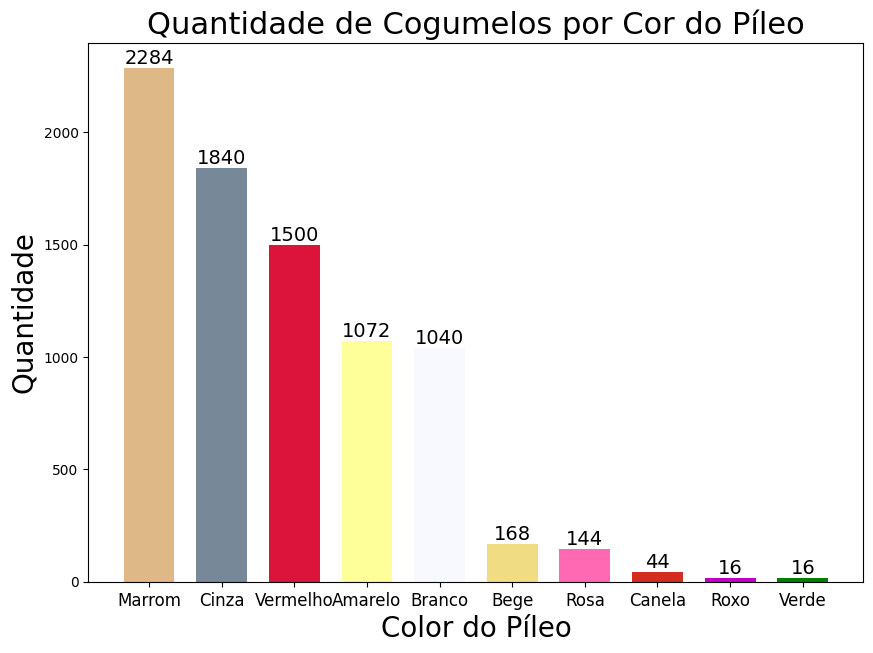

In [64]:
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()


ind = np.arange(10)
width = 0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

fig, ax = plt.subplots(figsize=(10,7))

mushroom_bars = ax.bar(ind, m_height, width, color=colors)

ax.set_xlabel("Color do Píleo",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Quantidade de Cogumelos por Cor do Píleo',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('Marrom', 'Cinza','Vermelho','Amarelo','Branco','Bege','Rosa','Canela','Roxo','Verde'),
                  fontsize = 12)

def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)
plt.show()

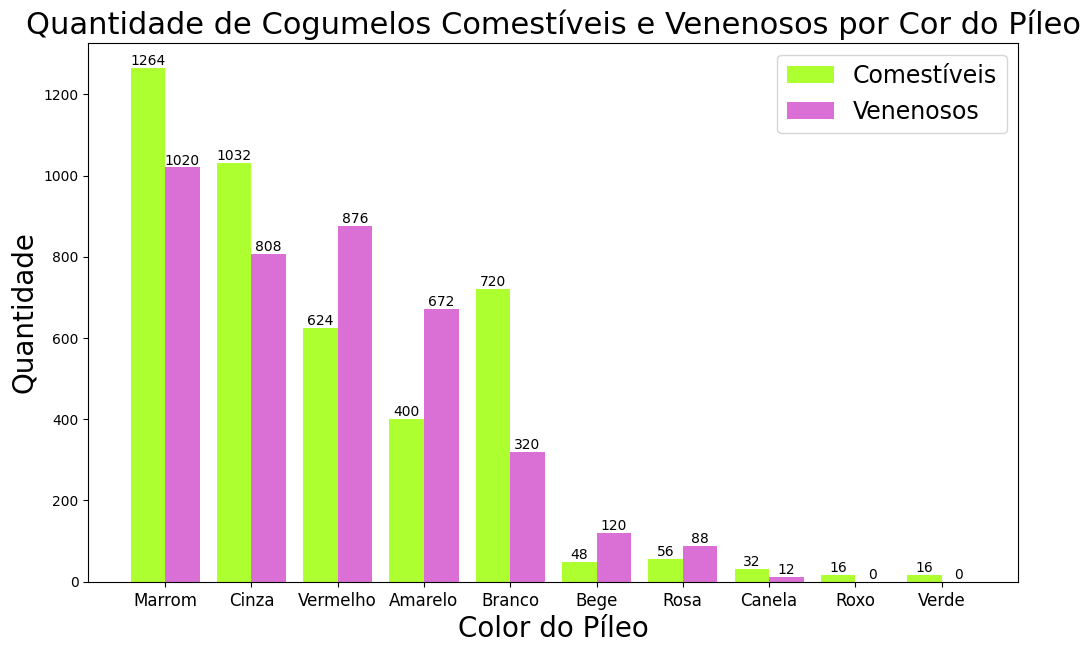

In [65]:
poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)


width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')



ax.set_xlabel("Color do Píleo",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Quantidade de Cogumelos Comestíveis e Venenosos por Cor do Píleo',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Marrom', 'Cinza','Vermelho','Amarelo','Branco','Bege','Rosa','Canela','Roxo','Verde'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Comestíveis','Venenosos'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

Como podemos ver, os tipos de cogumelo são muito variados entre as diversas cores, com exceção dos cogumelos roxos e verdes, portanto precisamos de mais informação para conseguir classificar. Vamos seguir analisando outros aspectos, sendo o próximo uma infomração fácil de se obter manualmente, o odor do cogumelo.

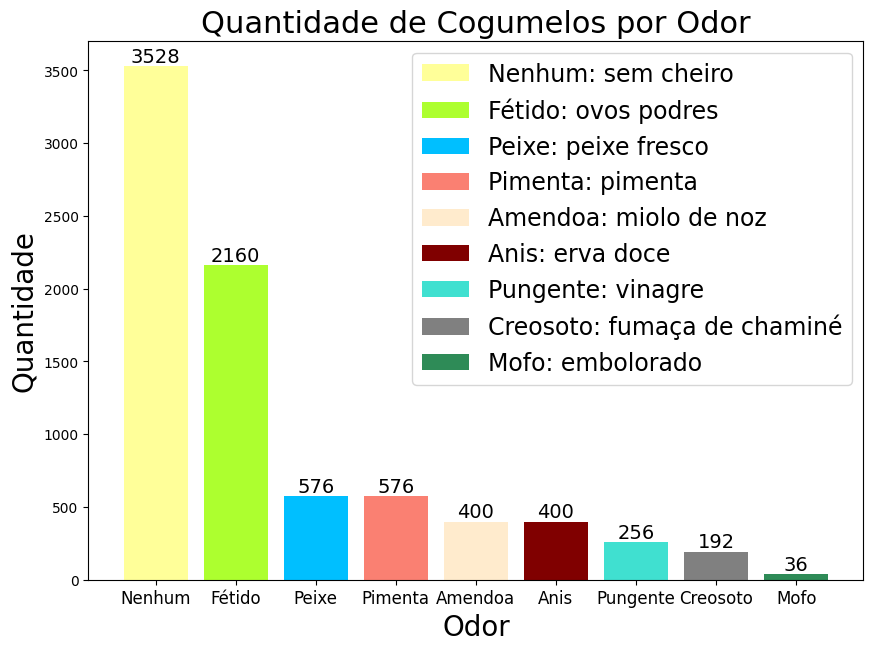

In [66]:
odors = mushrooms['odor'].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist()

width = 0.8
ind = np.arange(9)
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)


ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Quantidade de Cogumelos por Odor',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('Nenhum', 'Fétido','Peixe','Pimenta','Amendoa','Anis','Pungente','Creosoto','Mofo'),
                  fontsize = 12)
ax.legend(odor_bars, ['Nenhum: sem cheiro','Fétido: ovos podres', 'Peixe: peixe fresco','Pimenta: pimenta',
                      'Amendoa: miolo de noz', 'Anis: erva doce', 'Pungente: vinagre',
                     'Creosoto: fumaça de chaminé', 'Mofo: embolorado'],fontsize=17)
autolabel(odor_bars)
plt.show()

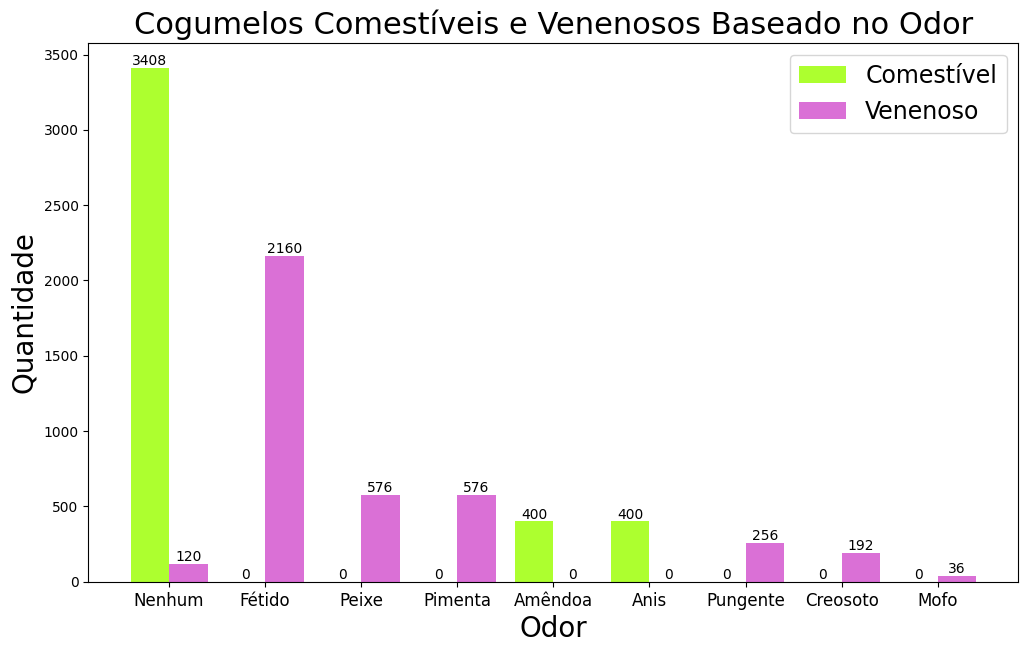

In [67]:
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odor].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odor) & (mushrooms['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)

width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')


ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantidade',fontsize=20)
ax.set_title('Cogumelos Comestíveis e Venenosos Baseado no Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Nenhum', 'Fétido','Peixe','Pimenta','Amêndoa','Anis','Pungente','Creosoto','Mofo'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('Comestível','Venenoso'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

Podemos ver que a divisão por odor traz uma distinção muito clara de quais os cogumelos são comestíveis e quais cogumelos são venenosos, o único caso que possui algum risco acaba sendo quando o cogumelo não possui cheiro, tendo 3% de chance do cogumelo não ser comestível.
Partindo agora para examinar sobre como o cogumelo se agrupa em populações, seja individual ou em grupo:

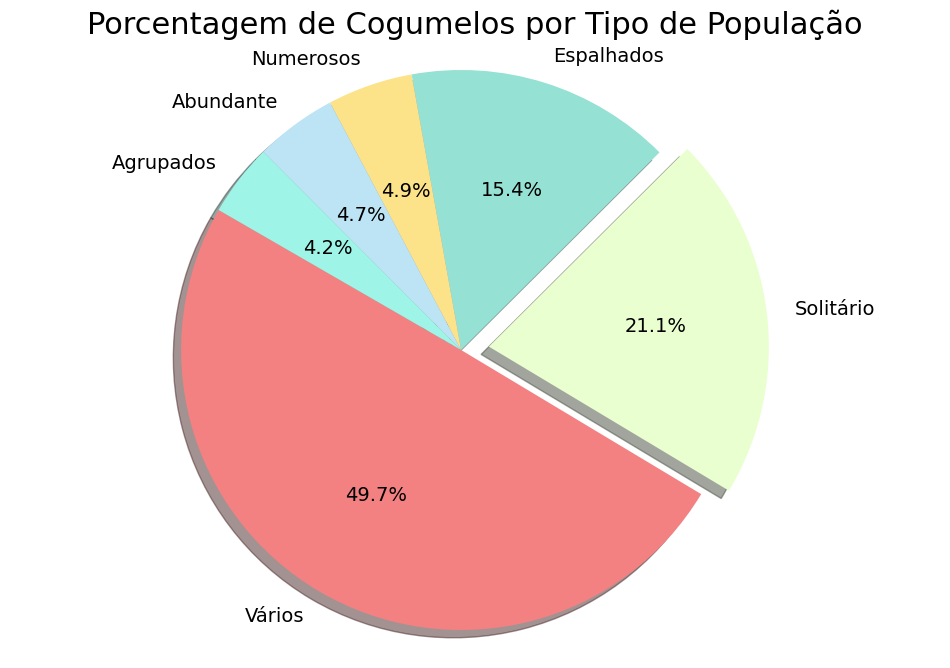

In [68]:
populations = mushrooms['population'].value_counts()
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist()

# Data to plot
pop_labels = 'Vários', 'Solitário', 'Espalhados', 'Numerosos', 'Abundante', 'Agrupados'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Porcentagem de Cogumelos por Tipo de População', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

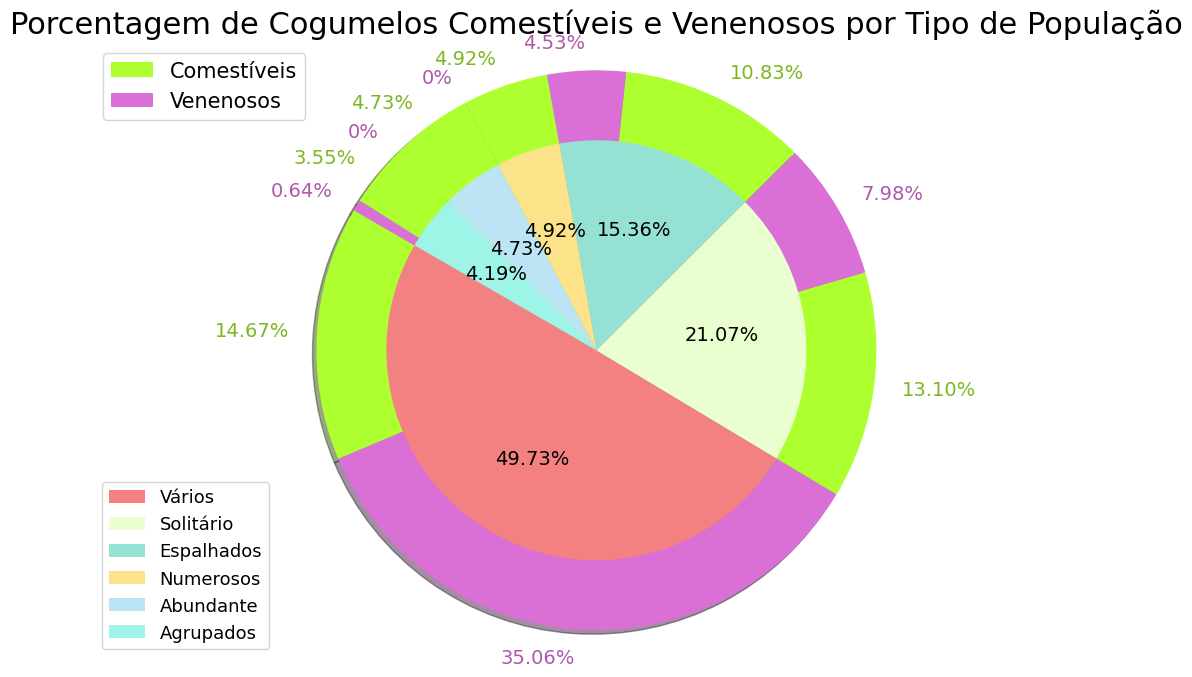

In [69]:
poisonous_pop = []
edible_pop = []
for pop in pop_types:
    size = len(mushrooms[mushrooms['population'] == pop].index)
    edibles = len(mushrooms[(mushrooms['population'] == pop) & (mushrooms['class'] == 'e')].index)
    edible_pop.append(edibles)
    poisonous_pop.append(size-edibles)
combine_ed_poi = []
for i in range(0,len(edible_pop)):
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])


fig = plt.subplots(figsize=(13,8))
plt.title('Porcentagem de Cogumelos Comestíveis e Venenosos por Tipo de População', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%']

patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#ADFF2F','#DA70D6'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721')
    else:
        texts1[i].set_color('#AE59AB')
    texts1[i].set_fontsize(14)
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['Comestíveis','Venenosos'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

A forma como os cogumelos se acumulam varia muito, no entanto quanto maior o agrupamento deles, maior a probabilidade deles serem comestíveis. Por último, antes de treinarmos o nosso modelo vamos analisar como os cogumelos se dividem por habitat:



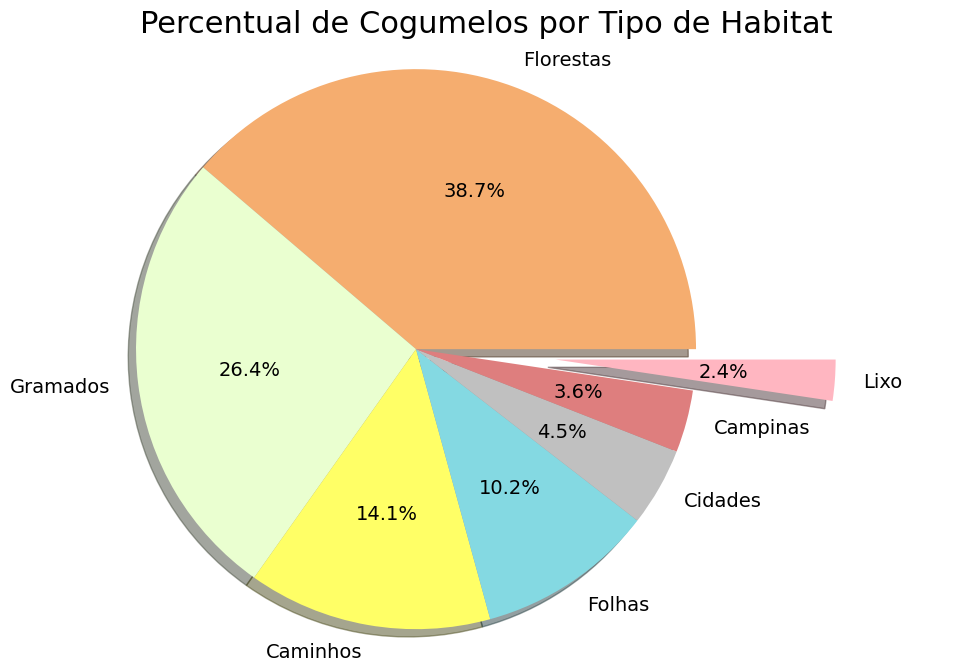

In [70]:
habitats = mushrooms['habitat'].value_counts()
hab_size = habitats.values.tolist()
hab_types = habitats.axes[0].tolist()

hab_labels = 'Florestas', 'Gramados', 'Caminhos', 'Folhas', 'Cidades', 'Campinas', 'Lixo'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)
fig = plt.figure(figsize=(12,8))

plt.title('Percentual de Cogumelos por Tipo de Habitat', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

Neste gráfico podemos perceber que a divisão de local onde os cogumelos são encontrados dificulta muito saber se eles são comestíveis ou venenosos, com exceção de cogumelos encontrados em ambientes de lixo, que são classificados todos como comestíveis. (Apesar de achar pouco provável, por questões de higiene, que alguém vá comer cogumelos encontrados em ambientes de lixo)

Com base nisso podemos perceber que um modelo de classificação de Decision Tree pode apresentar resultados significativos, já que as características do nosso dataset favorecem o mesmo

Partindo agora para os nossos modelos de classificação:

Pouquíssimo pré=processamento foi necessário, apenas foi feito um drop no veil-type pois embora use 2 valores (u e p), a base de dados so apresenta ele com p, desnecessário então retirado.

In [71]:
path = kagglehub.dataset_download("uciml/mushroom-classification")
mushrooms = pd.read_csv(path+'/mushrooms.csv')

X = mushrooms.drop(['class', 'veil-type'], axis=1)
y = mushrooms['class']

Using Colab cache for faster access to the 'mushroom-classification' dataset.


# Opcional: Algumas avaliacoes antes de realizar os testes

In [72]:
print(mushrooms.describe(include='all'))


# Quais os atributos mais importantes?
from sklearn.feature_selection import mutual_info_classif

mushcopy = mushrooms.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in mushcopy.columns:
    mushcopy[col] = le.fit_transform(mushcopy[col])
#mushcopy['class'] = mushrooms['class']

X=mushcopy.drop('class',axis=1)
y=mushrooms['class']

importances = mutual_info_classif(X, y)

feat_importances = pd.Series(importances, index=X.columns)
print(feat_importances.sort_values(ascending=False).head(8)) # Aponta os mais atributos mais importantes que definem a classe final

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

Escolha de um encoder
1. LabelEncoder

Ta funcionando bem com o RandomForest

2. OneHotEncoder

Funciona com a maioria

Escolha um e use com algum modelo

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [74]:
X_encoded = pd.get_dummies(X)

Separacao entre treino e testes

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.2, random_state=42)

# Escolha do modelo de treinamento
1. KNeighbors
2. RandomForest
3. Naive Bayes Gaussiano
4. MLP

Escolha um e rode o ultimo para fazer a previsao

In [76]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=150,       # trees
    max_depth=None,         # allow trees to grow until leaves are pure
    random_state=42
)

In [78]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [79]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [80]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrificando o teste e avaliando a acuracia e o modelo

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}") # 80%
print(classification_report(y_test, y_pred, target_names=["edible","poisonous"])) # target_names=y # p,e would be inverse?
print(f"Matrix de Confusao:", confusion_matrix(y_test, y_pred))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy') #og: cv=5
print("Mean CV accuracy:", scores.mean())

Acurácia: 1.00
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matrix de Confusao: [[843   0]
 [  0 782]]
Mean CV accuracy: 1.0


Alguns dos resultados obtidos para os modelos de classificação testados:
## KNN
* 1 vizinho, LabelEncoder, metrica padrao (Minkowski) -> CV: 0.9997538461538461
* 1 vizinho, LabelEncoder, metrica p=2 (Euclidiana) -> CV: 0.9997538461538461
* 1 vizinho, LabelEncoder, metrica p=1 -> CV: 1.0, 0.9214466085638499 sem Stratified
* 2 vizinhos, LabelEncoder, metrica padrao (Minkowski) -> CV: 0.9991384615384614
* 2 vizinhos, LabelEncoder, metrica p=1 () -> CV: 1.0
* 2 vizinhos, LabelEncoder, metrica euclidiana -> CV: 0.9991384615384614
* 3 vizinhos, LabelEncoder, metrica padrao (Minkowski) -> CV: 0.9992615384615384
* 3 vizinhos, LabelEncoder, metrica p=1 -> CV: 1.0
* 5 vizinhos, LabelEncoder, metrica padrao (Minkowski) -> CV: 0.9987690791966652

## RandomForest
* 150 arvores, LabelEncoder, max_depth None -> 1.0 com Stratified, 0.9018666919287609 sem
* 150 arvores, OHE, max_depth None -> 1.0 com Stratified, 0.9240341796134899 sem
* 100 arvores, ... -> 1.0 com Stratified, 0.9035908298597954 sem
* 100 arvores, OHE, -> 1.0 com Strag, 0.9220637362637364 sem
* 200 arvores, LabelEncoder, ... -> 1.0 com StratifiedKfold, 0.9024826070481243 sem

## Gaussian Naive Bayes
* LabelEncoder e Parametros Padrao: 0.7259685486926866 sem Stratified, 0.9220823796892763 com
* OneHotEncoder e padrao: 0.8516481242895036 sem Stratified, 0.9581486926866237 com

## MLP
* LabelEncoder, Size of hidden layers: (10,) , max_iters = 1000 -> Accur: 1.0, CV: 0.9998769230769231
* LabelEncoder, Size of hidden layers: (10,), max_iters = 300 -> Accur: 1.0, CV: 0.9998769230769231
* OHE, Size Hidden: (10,), max_iters: 300 -> Accur: 1.0, CV: 1.0

# Grafico de Matrix de Confusao

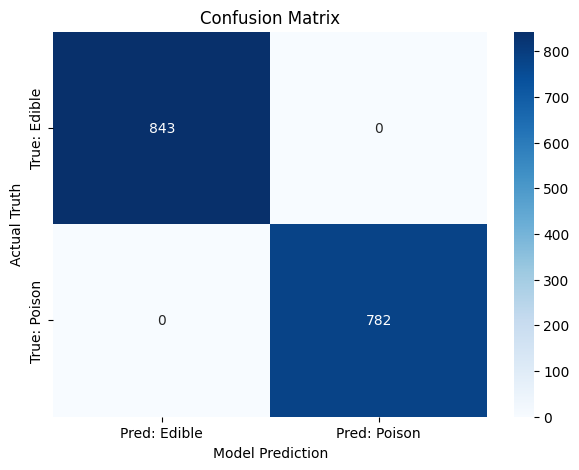

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Edible', 'Pred: Poison'],
            yticklabels=['True: Edible', 'True: Poison'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Truth')
plt.xlabel('Model Prediction')
plt.show()

O último modelo aplicado foi um Decision Tree Classifier, junto de um Label Encoder:

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

path = kagglehub.dataset_download("uciml/mushroom-classification")+'/mushrooms.csv'
mushrooms = pd.read_csv(path)

X = mushrooms.drop(columns=['class'])
y = mushrooms['class']

le_dict = {}
X_encoded = X.copy()

for column in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    le_dict[column] = le

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Using Colab cache for faster access to the 'mushroom-classification' dataset.
Acurácia do modelo: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Matriz de Confusão:
[[843   0]
 [  0 782]]



Como podemos ver, a escolha de utilizar um classificador de árvore, seja árvore de decisão, seja uma árvore de decisão ou uma random forest, se pagou, já que obtivemos uma acurácia de 1 para o nosso modelo, apesar de ser esperado um resultado bom não era esperado um modelo tão preciso e isso acabou gerando uma falta de desafio para o nosso trabalho, com isso migramos de dataset, mantendo o mesmo tema, de classificação de cogumelos.

# Dataset de classificação de imagens

Para este dataset, não existe muita coisa para analisarmos antes de partirmos para o modelo de classificação, o que temos aqui é um dataset com 12GB de imagens de cogumelo, composto por 168 espécies diferentes, com 75.000+ imagens definidas para treinamento e 15.000+ imagens definidas para teste.

Neste dataset o que precisamos fazer é converter as imagens em objetos que possam ser interpretados pelos nosssos modelos de classificação:

In [84]:
import pandas as pd
import numpy as np
import kagglehub
import cv2
import os

path = kagglehub.dataset_download("zlatan599/mushroom1")
display(path)
mushroomdf_val = pd.read_csv(f"{path}/val.csv") # nao irei usar provavelmente para a analise mas ja deixo ai
mushroomdf_test = pd.read_csv(f"{path}/test.csv") # val kinda related to test
mushroomdf_train = pd.read_csv(f"{path}/train.csv").drop_duplicates(subset=["image_path"])

mushroomdf_val['image_path'] = mushroomdf_val['image_path'].str.replace('/kaggle/working','/kaggle/input/mushroom1')
mushroomdf_train['image_path'] = mushroomdf_train['image_path'].str.replace('/kaggle/working','/kaggle/input/mushroom1')
mushroomdf_test['image_path'] = mushroomdf_test['image_path'].str.replace('/kaggle/working','/kaggle/input/mushroom1')

paths_val = mushroomdf_val.image_path
paths_train = mushroomdf_train.image_path
paths_test = mushroomdf_test.image_path

paths = list(paths_train) + list(paths_test)


# Mais velocidade usando multiprocessamento
from joblib import Parallel, delayed

X_train = []
y_train = []
X_test = []
y_test = []

# These can be found in /content
if os.path.exists("X_train.npy") and os.path.exists("y_train.npy") and os.path.exists("X_test.npy") and os.path.exists("y_test.npy"):
    X_train = np.load("X_train.npy")
    y_train = np.load("y_train.npy", allow_pickle=True)
    X_test = np.load("X_test.npy")
    y_test = np.load("y_test.npy", allow_pickle=True)
    print("Loaded from files")
else:
  print("Loading images...")

  def loadImg(path):
    try:
      img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (64, 64))
      return img.flatten() / 255.0
    except Exception as e:
      print(f"{e} - Error loading {path}")
      return None

  results = Parallel(n_jobs=-1, prefer="threads")(
      delayed(loadImg)(p)
      for p in paths
  )

  #Removendo cargas falhas
  results = [img for img in results if img is not None]

  X_train = np.array(results[:len(paths_train)])
  y_train = mushroomdf_train.label.to_numpy()

  X_test = np.array(results[len(paths_train):])
  y_test = mushroomdf_test.label.to_numpy()

  # save
  np.save("X_train.npy", X_train)
  np.save("y_train.npy", y_train)
  np.save("X_test.npy", X_test)
  np.save("y_test.npy", y_test)

# ~4 minutos se kaggle nao presente
# ~8-10mins pra tudo ser alocado
# ~18segundos-1minuto  se tudo presente

# Algumas verificacoes para ver se ta tudo certo, pode ser comentado
print(f"Total train paths: {len(paths_train)}, total test paths: {len(paths_test)}")
print(f"Images on train loaded: {len(X_train)}, labels loaded: {len(y_train)}, images on test: {len(X_test)}, labels on test: {len(y_test)}")

print(f"Shape of X_train: {X_train.shape} and of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} and of y_test: {y_test.shape}")

Using Colab cache for faster access to the 'mushroom1' dataset.


'/kaggle/input/mushroom1'

Loaded from files
Total train paths: 72858, total test paths: 15614
Images on train loaded: 72858, labels loaded: 72858, images on test: 15614, labels on test: 15614
Shape of X_train: (72858, 4096) and of y_train: (72858,)
Shape of X_test: (15614, 4096) and of y_test: (15614,)


# Criação do modelo de classificação Multi Layer Perceptron

In [85]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=20, random_state=42)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.10759574740617395
                             precision    recall  f1-score   support

          Agaricus augustus       0.00      0.00      0.00        51
      Agaricus xanthodermus       0.03      0.02      0.02        46
     Amanita amerirubescens       0.00      0.00      0.00        50
            Amanita augusta       0.00      0.00      0.00        50
        Amanita brunnescens       0.00      0.00      0.00        46
      Amanita calyptroderma       0.04      0.06      0.04        49
            Amanita citrina       0.06      0.02      0.03        44
         Amanita flavoconia       0.00      0.00      0.00        48
           Amanita muscaria       0.09      0.46      0.15       687
         Amanita pantherina       0.00      0.00      0.00        51
          Amanita persicina       0.50      0.03      0.05        39
         Amanita phalloides       0.02      0.02      0.02        48
          Amanita rubescens       0.00      0.00      0.00        79

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Criação do modelo de classificação SVM

Mude o valor das variáveis abaixo conforme sentir necessidade

In [86]:
'''
nucleo
linear - mais simples
rbf - mais apropriado para classificação de imagens
polynomial - utilizado para avaliar interação de características
sigmoid - mais apropriado para redes neurais
'''

nucleo = 'rbf'

'''
subset_size - valor definido entre 0 e 1
'''
subset_size = 0.25

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


def svm(nucleo, subset_size):
  svm_model = SVC(kernel=nucleo, random_state=42, verbose=True)

  X_train_subset, _, y_train_subset, _ = train_test_split(
      X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42
  )

  print(f"Treinando modelo SVM com um subconjunto de {len(X_train_subset)} amostras...")
  svm_model.fit(X_train_subset, y_train_subset)
  print("Treinamento do modelo SVM completo.")
  return svm_model

svm_model = svm(nucleo, subset_size)

Treinando modelo SVM com um subconjunto de 18214 amostrar...
[LibSVM]Treinamento do modelo SVM completo.


In [88]:
print("Fazendo predições no conjunto de teste...")
y_pred = svm_model.predict(X_test)
print("Predições completas.")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurária: {accuracy:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Fazendo predições no conjunto de teste...
Predições completas.

Acurária: 0.1108

Relatório de Classificação:
                             precision    recall  f1-score   support

          Agaricus augustus       0.00      0.00      0.00        51
      Agaricus xanthodermus       0.00      0.00      0.00        46
     Amanita amerirubescens       0.00      0.00      0.00        50
            Amanita augusta       0.00      0.00      0.00        50
        Amanita brunnescens       0.00      0.00      0.00        46
      Amanita calyptroderma       0.00      0.00      0.00        49
            Amanita citrina       0.00      0.00      0.00        44
         Amanita flavoconia       0.00      0.00      0.00        48
           Amanita muscaria       0.09      0.57      0.16       687
         Amanita pantherina       0.00      0.00      0.00        51
          Amanita persicina       0.00      0.00      0.00        39
         Amanita phalloides       0.00      0.00      0.00   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


COm isso chegamos ao final do nosso projeto, obtivemos resultados muito baixos para o dataset de imagens porque ele é muito amplo, são muitas classes que podem ser trabalhadas e algumas classes são muito similares, para melhorarmos os nossos resultados seria necessário um poder computacional maior e um aprofundamento do nosso conhecimento, aplicando muito mais do que tivemos dentro da nossa disciplina, no entanto o resultado mostra que estamos no caminho correto para seguir na área de aprendizado de máquina.